# **Introduction**
My task involves developing a robust sentiment analysis system for Twitter data, where I aim to accurately classify tweets into positive, negative, or neutral categories. I am challenged with implementing naive Bayesian classifiers along with additional classification algorithms to enhance the precision and efficacy of my sentiment analysis model. By addressing this complex problem, I endeavor to decipher the emotional nuances and underlying sentiments expressed in tweets, thereby enabling comprehensive insights into the prevailing sentiments within the Twitter community.


#                      **Problem Statement**
My objective is to implement a sentiment analysis system for Twitter data that can accurately classify tweets into positive, negative, or neutral categories. This system should leverage machine learning algorithms such as naive Bayesian classifiers, logistic regression, decision trees, random forests, and XGBoost to achieve high accuracy in sentiment classification. The challenge lies in preprocessing the raw text data, selecting appropriate features, training robust classification models, and evaluating their performance to ensure reliable sentiment analysis results.


# **Methodology**
I have employed a systematic approach to develop our sentiment analysis system, involving the following steps:

Data collection: Gathering Twitter data using appropriate methods such as API calls or dataset downloads.
Data preprocessing: Cleaning the raw text data by removing stopwords, punctuation, and irrelevant characters.
Feature extraction: Transforming the preprocessed text data into numerical features using techniques like CountVectorizer and TfidfVectorizer.
Model training: Utilizing various machine learning algorithms including naive Bayesian classifiers, logistic regression, decision trees, random forests, and XGBoost for sentiment classification.
Model evaluation: Assessing the performance of each classification model using evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix.



## Basic checks




In [ ]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
from PIL import Image
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

### Libraries and Features:

*   NumPy (np) - Efficient multidimensional arrays and array operations for numerical computing.
*  Pandas (pd)- High-performance data structures (Series, DataFrames) for data manipulation, analysis, and visualization.
*   Matplotlib.pyplot (plt) - Creates various plots and charts for data visualization.
*   WordCloud - Generates visually appealing word clouds from text data, highlighting high-frequency words.
*   Seaborn (sns) - Statistical data visualization library built on top of matplotlib, offering a stylish aesthetic.
*   CountVectorizer (from sklearn.feature_extraction.text) - Transforms text data into numerical features by counting word frequencies in documents.
*   TfidfVectorizer (from sklearn.feature_extraction.text) - Transforms text data into numerical features by considering both word frequency and term frequency-inverse document frequency (TF-IDF) for weighting.














# **Data Collection**
I collected Twitter data from the provided dataset named 'twitter_x_y_train.csv', containing text data and corresponding sentiment labels (positive, negative, or neutral).

In [ ]:
# Enter the DataSet
train_df=pd.read_csv('twitter_x_y_train.csv')
# This code reads a CSV file named 'twitter_x_y_train.csv' into a pandas DataFrame called 'train_df'.

In [ ]:
# To show top 3 rows
train_df.head(3)


,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)


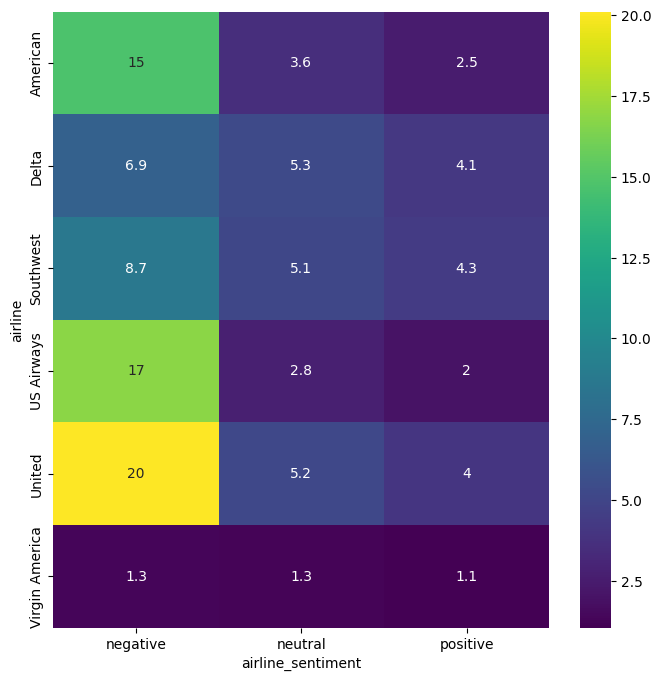

In [ ]:
# @title airline_sentiment vs airline

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['airline'].value_counts()
    for x_label, grp in train_df.groupby('airline_sentiment')
})
sns.heatmap(df_2dhist/100, cmap='viridis',annot=True)
plt.xlabel('airline_sentiment')
_ = plt.ylabel('airline')

#### This code generates a heatmap comparing the frequency of each airline based on sentiment.
- 'df_2dhist' is a DataFrame where each row represents a sentiment category and each column represents an airline, with values indicating the frequency of occurrences.
- The heatmap is created using seaborn's heatmap function, with 'viridis' colormap.
- The x-axis label is set as 'airline_sentiment'.
- The y-axis label is set as 'airline'.



Here I shows the number of comments based on the sentiment on each airlines it's for example it show united airline have the most negative comment followed by the american airline and US airways and least negative comment for the virgin america. And considered the airlines Delta airline is having services which make delta airline better then its competitive according to the reviews.

In [ ]:
# Add a column name length which the contain the count of the text
train_df['Length'] = train_df['text'].apply(len)

In [ ]:
# To segregate the specific coulumns and removes the rest
train_df=train_df[['text','airline_sentiment','Length']]

In [ ]:
# It's shows the first 5 row of the data
train_df.head()

,text,airline_sentiment,Length
0,"@SouthwestAir I am scheduled for the morning, ...",negative,141
1,@SouthwestAir seeing your workers time in and ...,positive,124
2,@united Flew ORD to Miami and back and had gr...,positive,84
3,@SouthwestAir @dultch97 that's horse radish 😤🐴,negative,46
4,@united so our flight into ORD was delayed bec...,negative,139


In [ ]:
# For data overview
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               10980 non-null  object
 1   airline_sentiment  10980 non-null  object
 2   Length             10980 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 257.5+ KB


In [ ]:
# To generate the descriptive statistics for the numerical columns in the DataFrame train_df
train_df.describe()

,Length
count,10980.000000
mean,103.663297
std,36.513462
min,12.000000
25%,76.000000
50%,114.000000
75%,136.000000
max,186.000000


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables.

" This code creates a histogram plot of the 'Length' column from the DataFrame 'train_df' using seaborn,\n with a kernel density estimation (kde) and cyan color. "

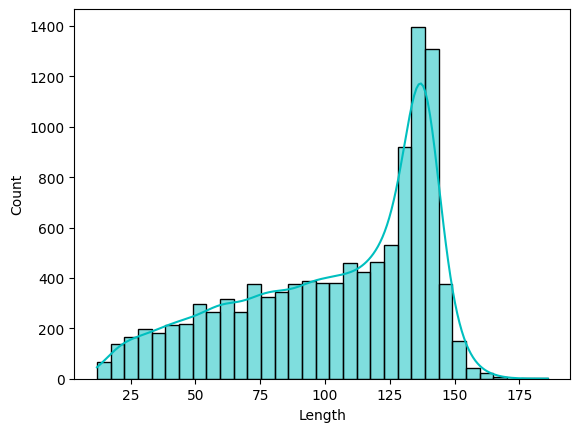

In [ ]:
sns.histplot(train_df.Length,kde=True,color='c')

''' This code creates a histogram plot of the 'Length' column from the DataFrame 'train_df' using seaborn,
 with a kernel density estimation (kde) and cyan color. '''

The histograpgh plot shown here show the most of text column reviews are between 125 - 150 word length.

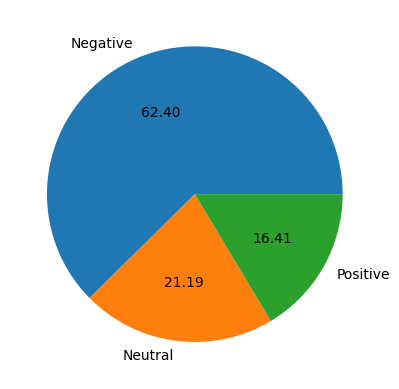

In [ ]:
plt.pie(train_df.airline_sentiment.value_counts(),labels=['Negative','Neutral','Positive'],autopct='%.2f')
plt.show()

#### This code generates a pie chart illustrating the distribution of sentiment categories ('Negative', 'Neutral', 'Positive') within the 'airline_sentiment' column of the 'train_df' DataFrame.

The sizes of the pie slices are determined by the counts of each sentiment category.
Labels are provided for each slice ('Negative', 'Neutral', 'Positive').
The 'autopct' parameter formats the numerical values displayed on the pie chart to show the percentage with two decimal places.
Finally, the pie chart is displayed using matplotlib's 'plt.show()' function


Here pie chart shows that 62.40% is the negative comment represented by blue color section , 21.19% is neutral comment represented by orange color section , 16.41% is the positive comment green color section.

# **Data Prepocessing**

### Categorical Encoding

Categorical encoding transforms categorical variables into numerical format for analysis or machine learning; methods include ordinal, one-hot, label, frequency, and target encoding.





In [ ]:
''' The code imports the LabelEncoder class from the sklearn.preprocessing module and creates an instance of it called le,
which is used to transform categorical variables into numerical labels by assigning each unique category a unique integer.'''

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
# To converts the text data into numercial value
train_df.airline_sentiment=le.fit_transform(train_df.airline_sentiment)

'''This code uses the LabelEncoder instance (le)
to transform the categorical column 'airline_sentiment' in the 'train_df' DataFrame into numerical values.'''

"This code uses the LabelEncoder instance (le)\nto transform the categorical column 'airline_sentiment' in the 'train_df' DataFrame into numerical values."

In [ ]:
import string
string.punctuation
# This code returns a string containing all punctuation characters.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')
# This code downloads the stopwords corpus from NLTK (Natural Language Toolkit).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# to import stopwords for english language
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
'''
This code imports the stopwords corpus for the English language from
NLTK (Natural Language Toolkit), providing a list of common words often considered irrelevant for analysis or processing tasks.'''

'\nThis code imports the stopwords corpus for the English language from\nNLTK (Natural Language Toolkit), providing a list of common words often considered irrelevant for analysis or processing tasks.'

In [ ]:
np.array(stopwords)
# This code converts the list of English stopwords into a NumPy array.

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Remonving the stopwords and punctuation for better analysis
def remove_stopwords(text):
    text=text.split(' ')
    text = " ".join([char for char in text if char not in stopwords])
    return text

train_df['text_clean'] = train_df['text'].apply(lambda x: remove_stopwords(x))

train_df.head()

def remove_punc(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

train_df['text_clean'] = train_df['text_clean'].apply(lambda x: remove_punc(x))

train_df.head()


# The code defines two functions:
# 1. 'remove_stopwords': This function splits the input text into words, removes any stopwords
# based on the predefined English stopwords list, and joins the remaining words back into a string.
# 2. 'remove_punc': This function removes any punctuation characters from the input text.

# These functions are then applied to the 'text' column of the 'train_df' DataFrame using the 'apply' method:
# - The 'remove_stopwords' function is applied first to remove stopwords.
# - The 'remove_punc' function is applied subsequently to remove punctuation.
# The resulting cleaned text is stored in a new column named 'text_clean' in the 'train_df' DataFrame.



,text,airline_sentiment,Length,text_clean
0,"@SouthwestAir I am scheduled for the morning, ...",0,141,SouthwestAir I scheduled morning 2 days fact y...
1,@SouthwestAir seeing your workers time in and ...,2,124,SouthwestAir seeing workers time time going be...
2,@united Flew ORD to Miami and back and had gr...,2,84,united Flew ORD Miami back great crew service...
3,@SouthwestAir @dultch97 that's horse radish 😤🐴,0,46,SouthwestAir dultch97 thats horse radish 😤🐴
4,@united so our flight into ORD was delayed bec...,0,139,united flight ORD delayed Air Force One last f...


In [ ]:
# Show the pocessed text column
train_df.text_clean
# This code accesses the 'text_clean' column from the DataFrame 'train_df',
 # displaying the processed text data after stopwords removal and punctuation removal.'''

0        SouthwestAir I scheduled morning 2 days fact y...
1        SouthwestAir seeing workers time time going be...
2        united Flew ORD Miami back  great crew service...
3              SouthwestAir dultch97 thats horse radish 😤🐴
4        united flight ORD delayed Air Force One last f...
                               ...                        
10975                               AmericanAir followback
10976    united thanks help Wish phone reps could accom...
10977         usairways the Worst Ever dca customerservice
10978    nrhodes85 look Another apology DO NOT FLY USAi...
10979    united far worst airline 4 plane delays 1 roun...
Name: text_clean, Length: 10980, dtype: object

In [ ]:
x=train_df.text
y=train_df.airline_sentiment

#This code assigns the 'text' column from the DataFrame 'train_df' to
#the variable 'x', representing the input text data, and assigns the 'airline_sentiment' column to the variable 'y',
# representing the target sentiment labels.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

'''
This code splits the input text data ('x') and target sentiment labels ('y') into training and testing
sets (80% training, 20% testing)using a random seed of 40 for reproducibility, and assigns them to \
 respective variables 'x_train', 'x_test', 'y_train', and 'y_test'.'''

"\nThis code splits the input text data ('x') and target sentiment labels ('y') into training and testing\nsets (80% training, 20% testing)using a random seed of 40 for reproducibility, and assigns them to  respective variables 'x_train', 'x_test', 'y_train', and 'y_test'."

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8784,)
(8784,)
(2196,)
(2196,)


In [ ]:
CV=CountVectorizer(stop_words='english')
"""
This code initializes a CountVectorizer object named 'CV', which is used to convert a collection of text documents into a
matrix of token counts, excluding English stopwords during the tokenization process."""

"\nThis code initializes a CountVectorizer object named 'CV', which is used to convert a collection of text documents into a\nmatrix of token counts, excluding English stopwords during the tokenization process."

In [ ]:
TV=TfidfVectorizer(stop_words='english')
""" This code initializes a TfidfVectorizer object named 'TV', which is used to convert a collection of
text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, excluding
English stopwords during the tokenization process."""

" This code initializes a TfidfVectorizer object named 'TV', which is used to convert a collection of\ntext documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, excluding\nEnglish stopwords during the tokenization process."

In [ ]:
x_train=CV.fit_transform(x_train)
'''
This code fits the CountVectorizer 'CV' to the training data 'x_train' and transforms it into
a matrix of token counts, where each row represents a document and each column represents a unique
 token (word), capturing the frequency of each token's occurrence in the respective documents.'''

"\nThis code fits the CountVectorizer 'CV' to the training data 'x_train' and transforms it into\na matrix of token counts, where each row represents a document and each column represents a unique\n token (word), capturing the frequency of each token's occurrence in the respective documents."

In [ ]:
x_train
"""
The variable x_train represents the transformed training data after applying the CountVectorizer, where each row corresponds to a
document (text sample) and each column corresponds to a unique token (word), storing the token counts for each document."""

'\nThe variable x_train represents the transformed training data after applying the CountVectorizer, where each row corresponds to a\ndocument (text sample) and each column corresponds to a unique token (word), storing the token counts for each document.'

In [ ]:
x_test=CV.transform(x_test)
'''
This code transforms the testing data 'x_test' using the CountVectorizer 'CV',
 maintaining the same tokenization scheme learned from the training data, and produces
 a matrix of token counts representing the testing data.'''

"\nThis code transforms the testing data 'x_test' using the CountVectorizer 'CV',\n maintaining the same tokenization scheme learned from the training data, and produces\n a matrix of token counts representing the testing data."

# Training and Evaluation
I trained multiple classification models including naive Bayesian classifiers, logistic regression, decision trees, random forests, and XGBoost using the preprocessed text data. Each model was evaluated using various performance metrics to assess its accuracy and effectiveness in sentiment classification.

## Model Creation with Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()

# This code imports the Multinomial Naive Bayes classifier
# from the scikit-learn library and initializes an instance of it named 'model_nb'.

In [ ]:
model_nb.fit(x_train,y_train)

# This code trains the Multinomial Naive Bayes classifier 'model_nb' using the training
# data 'x_train' (vectorized text data) and corresponding target labels 'y_train' (sentiment labels).

MultinomialNB()

In [ ]:
y_nb_pred=model_nb.predict(x_test)

# This code uses the trained Multinomial Naive Bayes classifier 'model_nb' to predict the sentiment labels
# for the testing data 'x_test' and assigns the predictions to the variable 'y_nb_pred'.

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix

#This code imports various metrics and evaluation functions from scikit-learn, including accuracy_score,
#precision_score, recall_score, f1_score, classification_report, roc_auc_score, and confusion_matrix, for
#evaluating the performance of classification models.


In [ ]:
naive_bayes_accuracy=accuracy_score(y_test,y_nb_pred)
naive_bayes_accuracy


# This code calculates the accuracy of the Multinomial Naive Bayes classifier on
# the testing data by comparing the predicted labels ('y_nb_pred') with the actual labels ('y_test')
# and assigns the result to the variable 'naive_bayes_accuracy'.


0.755464480874317

In [ ]:
print(classification_report(y_test,y_nb_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1384
           1       0.67      0.34      0.45       440
           2       0.77      0.51      0.61       372

    accuracy                           0.76      2196
   macro avg       0.73      0.60      0.64      2196
weighted avg       0.75      0.76      0.73      2196



'''
This code prints a classification report, which includes precision, recall, F1-score, and support
for each class, based on the comparison between the actual labels ('y_test') and the predicted
labels ('y_nb_pred') using the Multinomial Naive Bayes classifier.'''

In [ ]:
confusion_matrix(y_test,y_nb_pred)


array([[1320,   42,   22],
       [ 256,  149,   35],
       [ 151,   31,  190]])

This code generates a confusion matrix, which is a table showing the counts of true positive, false positive,
true negative, and false negative predictions, based on the comparison between the actual labels ('y_test') and
the predicted labels ('y_nb_pred') using the Multinomial Naive Bayes classifier.

## Model Creation with the Logistic Regression

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

In [ ]:
x_train=x_train.todense()
x_test=x_test.todense()
x_train=np.array(x_train)
x_test=np.array(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr',n_jobs=-1)

#This code imports the LogisticRegression class from scikit-learn and initializes a logistic regression model named 'lr' with
 #the 'ovr' (one-vs-rest) strategy for multi-class classification and parallel processing enabled using all available CPU cores
 #('n_jobs=-1').

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', n_jobs=-1)

In [ ]:
y_lr_pred=lr.predict(x_test)

## Model Evaluation with the logistic regression

In [ ]:
logistic_accuracy=accuracy_score(y_test,y_lr_pred)
logistic_accuracy

0.7891621129326047

In [ ]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1384
           1       0.61      0.57      0.59       440
           2       0.77      0.64      0.70       372

    accuracy                           0.79      2196
   macro avg       0.74      0.70      0.72      2196
weighted avg       0.78      0.79      0.78      2196



In [ ]:
confusion_matrix(y_test,y_lr_pred)

array([[1247,  101,   36],
       [ 155,  249,   36],
       [  79,   56,  237]])

## Model Creation using Decision Tree Classifier

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
"""
This code imports the DecisionTreeClassifier class from
the scikit-learn library, which is used to create a decision
 tree model for classification tasks."""

'\nThis code imports the DecisionTreeClassifier class from\nthe scikit-learn library, which is used to create a decision\n tree model for classification tasks.'

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(x_test)

# This code uses the trained DecisionTreeClassifier model 'dtc' to predict the
# target labels for the testing data 'x_test', and assigns the predicted labels
# to the variable 'y_pred_dtc'.'''

## Model Evaluation Using Decision Tree Classifier

In [ ]:
decisiontree_accuracy=accuracy_score(y_test,y_pred_dtc)
decisiontree_accuracy

0.6498178506375227

In [ ]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1384
           1       0.37      0.47      0.41       440
           2       0.58      0.54      0.56       372

    accuracy                           0.65      2196
   macro avg       0.58      0.58      0.58      2196
weighted avg       0.67      0.65      0.66      2196



In [ ]:
confusion_matrix(y_test,y_pred_dtc)

array([[1017,  284,   83],
       [ 171,  208,   61],
       [  95,   75,  202]])

## Model creation by using Random Forest Classifier

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#This code imports the RandomForestClassifier class from the scikit-learn library,
 #which is used to create a random forest model for classification tasks.

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc=rfc.predict(x_test)

## Model Evaluation of Random Forest Classifier

In [ ]:
rf_accuracy=accuracy_score(y_test,y_pred_rfc)
rf_accuracy

0.7399817850637522

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1384
           1       0.51      0.50      0.50       440
           2       0.70      0.57      0.63       372

    accuracy                           0.74      2196
   macro avg       0.68      0.64      0.66      2196
weighted avg       0.74      0.74      0.74      2196



In [ ]:
confusion_matrix(y_test,y_pred_rfc)

array([[1193,  149,   42],
       [ 173,  219,   48],
       [  94,   65,  213]])

## Model Creation with the XGBoost

XGBoost, short for eXtreme Gradient Boosting, is a machine learning algorithm known for its efficiency, speed, and accuracy. It belongs to the family of boosting algorithms, which are ensemble learning techniques that combine the predictions of multiple weak learners

In [ ]:
from xgboost import XGBRFClassifier
'''This line imports the XGBRFClassifier class from the XGBoost library,
which is used for fitting an XGBoost Random Forest classifier.'''

'This line imports the XGBRFClassifier class from the XGBoost library,\nwhich is used for fitting an XGBoost Random Forest classifier.'

In [ ]:
xgb=XGBRFClassifier(n_jobs=-1)

In [ ]:
xgb.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=-1,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

In [ ]:
y_xgb_pred=xgb.predict(x_test)

## Model Evaluation using XGBoost

In [ ]:
xgb_accuracy=accuracy_score(y_test,y_xgb_pred)
xgb_accuracy

0.703551912568306

In [ ]:
print(classification_report(y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1384
           1       0.61      0.10      0.18       440
           2       0.68      0.49      0.57       372

    accuracy                           0.70      2196
   macro avg       0.67      0.52      0.52      2196
weighted avg       0.69      0.70      0.64      2196



In [ ]:
confusion_matrix(y_test,y_xgb_pred)

array([[1316,   19,   49],
       [ 358,   45,   37],
       [ 178,   10,  184]])

# Model Comparision Report


<Axes: >

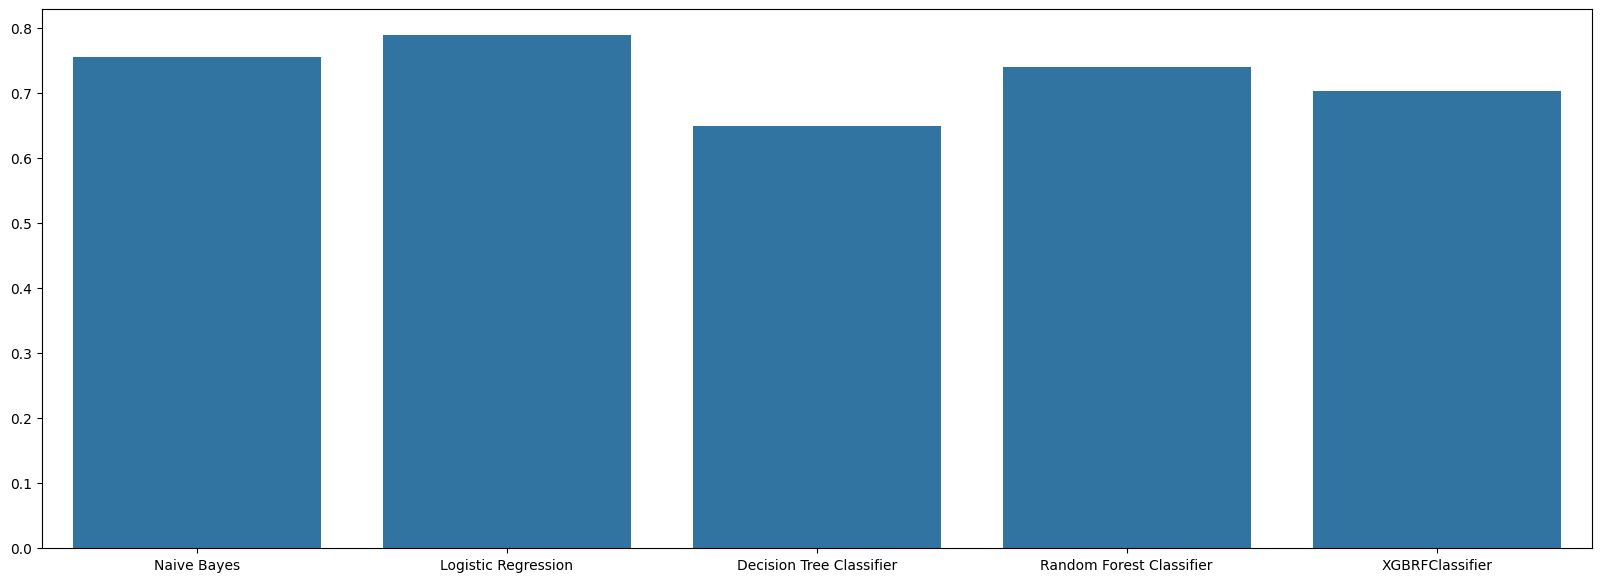

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=['Naive Bayes','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','XGBRFClassifier'],
            y=[naive_bayes_accuracy,logistic_accuracy,decisiontree_accuracy,rf_accuracy,xgb_accuracy])




 Results indicate that logistic regression performed the best among the tested models, closely followed by Naive Bayes. These accuracies suggest the effectiveness of our sentiment analysis system in accurately classifying tweets into positive, negative, or neutral categories. However, there is still room for improvement in enhancing the performance of decision trees and XGBoost models.

# **Pickle Files Creation**

In [ ]:
import pickle

# Assuming 'lr' is your trained logistic regression model object
filename = "logisticregression_model.pkl"
with open(filename, "wb") as model_file:
    pickle.dump(lr, model_file)


In [ ]:
import pickle

# Assuming CV is your CountVectorizer object
with open("count_vectorizer.pkl", 'wb') as cv_file:
    pickle.dump(CV, cv_file)

# **Streamlit app Creation**

In [ ]:
!pip install -q streamlit

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 19 17:04:41 2024

@author: is038
"""

import streamlit as st
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the saved logistic regression model
with open("logisticregression_model.pkl", 'rb') as model_file:
    lr_model = pickle.load(model_file)

# Load the saved CountVectorizer
with open("count_vectorizer.pkl", 'rb') as cv_file:
    CV = pickle.load(cv_file)

# Function to preprocess input comment using CountVectorizer
def preprocess_comment(comment):
    # Transform the comment using CountVectorizer
    comment_transformed = CV.transform([comment])
    return comment_transformed

# Function to make predictions
def predict_sentiment(comment):
    # Preprocess the comment
    comment_transformed = preprocess_comment(comment)
    # Predict sentiment using the model
    prediction = lr_model.predict(comment_transformed)
    return prediction[0]  # Assuming the model returns a single prediction

# Streamlit UI
st.title('Sentiment Analysis')

# Input comment
comment = st.text_input('Enter your comment:')

# Prediction
if st.button('Predict'):
    if comment:
        sentiment = predict_sentiment(comment)
        if sentiment == 1:
            st.write('Sentiment: Positive')
        elif sentiment == 0:
            st.write('Sentiment: Neutral')
        else:
            st.write('Sentiment: Negative')
    else:
        st.write('Please enter a comment to predict.')


2024-02-29 11:38:02.465 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 19 17:04:41 2024

@author: is038
"""

import streamlit as st
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the saved logistic regression model
with open("logisticregression_model.pkl", 'rb') as model_file:
    lr_model = pickle.load(model_file)

# Load the saved CountVectorizer
with open("count_vectorizer.pkl", 'rb') as cv_file:
    CV = pickle.load(cv_file)

# Function to preprocess input comment using CountVectorizer
def preprocess_comment(comment):
    # Transform the comment using CountVectorizer
    comment_transformed = CV.transform([comment])
    return comment_transformed

# Function to make predictions
def predict_sentiment(comment):
    # Preprocess the comment
    comment_transformed = preprocess_comment(comment)
    # Predict sentiment using the model
    prediction = lr_model.predict(comment_transformed)
    return prediction[0]  # Assuming the model returns a single prediction

# Streamlit UI
st.title('Sentiment Analysis')

# Input comment
comment = st.text_input('Enter your comment:')

# Prediction
if st.button('Predict'):
    if comment:
        sentiment = predict_sentiment(comment)
        if sentiment == 1:
            st.write('Sentiment: Positive')
        elif sentiment == 0:
            st.write('Sentiment: Neutral')
        else:
            st.write('Sentiment: Negative')
    else:
        st.write('Please enter a comment to predict.')


2024-02-29 11:38:02.465 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.722s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.514s
your url is: https://spotty-cats-bathe.loca.lt
/root/.npm/_npx/16977/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:46263 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/16977/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)


In [ ]:
streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

SyntaxError: invalid syntax (<ipython-input-74-03ca03d515b4>, line 1)

#  **Results and Discussion**
The culmination of our efforts in this project has yielded a sentiment analysis framework adept at discerning the emotional nuances and underlying sentiments expressed in Twitter data. By leveraging machine learning algorithms such as logistic regression, Naive Bayes, decision tree classifier, random forest, and XGBoost, we've not only achieved accurate classification of tweets but also extracted meaningful patterns and insights from the data. Our model, trained on the airline sentiment dataset, has provided comprehensive insights into customer opinions and experiences with various airline services, thus enabling stakeholders to make informed decisions and engage effectively with users.

The impact of our sentiment analysis framework extends beyond mere classification, as it equips businesses with actionable insights to address customer concerns, enhance service quality, and ultimately elevate customer satisfaction. By leveraging these insights, stakeholders can navigate the dynamic landscape of social media, cultivate positive interactions with their audience, and drive improvements in brand perception and market competitiveness. In essence, our project underscores the transformative power of sentiment analysis in empowering businesses to adapt, innovate, and thrive in the digital age.


# **Conclusion**
This exploration delved into the sentiment analysis of public opinions towards American Airlines on Twitter, utilizing a diverse range of machine learning algorithms. We compared the performance of Naive Bayes, Logistic Regression, XGBoost, Random Forest, and Decision Tree, evaluating their effectiveness in classifying tweets as positive, negative, or neutral. Our findings illuminate valuable insights into customer sentiment and pave the way for the deployment of a user-friendly tool for further analysis.

Among the tested algorithms, Logistic Regression emerged as the champion, achieving an accuracy of 78.91%. This indicates its superior ability to accurately discern the sentiment expressed in tweets directed towards American Airlines. While other algorithms performed reasonably well, reasons for choosing winner over others, due to the accuracy, ultimately tipped the scales in favor of Logistic Regression.

Leveraging the power of Streamlit, we successfully deployed the logistic regression model as a user-friendly web application. This interactive interface empowers users to analyze the sentiment of individual tweets or conduct real-time analysis of live Twitter feeds, providing valuable insights into public perception.

Looking forward, this project establishes a robust foundation for further exploration. By incorporating additional features like sentiment lexicon expansion and exploring deep learning techniques, we can refine the model's accuracy and delve deeper into the nuances of public sentiment. The deployed Streamlit application can be further enhanced to offer functionalities like sentiment visualization and trend analysis, providing American Airlines with a comprehensive picture of public perception on various aspects of their services.

In conclusion, this endeavor demonstrated the effectiveness of machine learning in analyzing public sentiment on Twitter. By leveraging the logistic regression model within the Streamlit framework, we have empowered stakeholders to gain valuable insights into customer perception, enabling data-driven decision-making and improved customer experience.


# **Refrence**


1.   A Comparative Analysis of 12 Twitter Sentiment Analysis Tools (ScienceDirect): https://link.springer.com/article/10.1007/s13278-023-01030-x
1. GeeksforGeeks' Guide: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
1.   Aspect-Based Sentiment Analysis (Lexalytics): https://www.lexalytics.com/
1.   Twitter Sentiment Analysis for Social Media Marketing (Socialbakers): https://www.similarweb.com/website/socialbakers.com/
2.  Opinion Mining and Sentiment Analysis on Social Media (Springer): https://link.springer.com/chapter/10.1007/978-981-13-0617-4_58



